In [2]:
# Importing modules
import pandas as pd
import os

In [3]:
os.chdir('..')

In [4]:
# Read data into papers
headlines_df = pd.read_csv("E:\Zemoso Personal\ParseHub Datasets\Final_News_Dataset.csv")

In [5]:
# Print head
headlines_df.head

<bound method NDFrame.head of                                           Headline_name  Unnamed: 1  \
0     TechCrunch podcasts this week: Layoffs, the cr...         NaN   
1     Nabla is now offering a health tech stack for ...         NaN   
2     Bonfire Ventures secures $230M for two new fun...         NaN   
3     Daily Crunch: Amazon will sunset Cloud Cam ser...         NaN   
4     Betastore gets $2.5M to solve stockouts, finan...         NaN   
...                                                 ...         ...   
2098  Show HN: Todool, a full blown environment for ...         NaN   
2099  How to stop a robot vacuum from getting stuck ...         NaN   
2100  High tuition costs mostly stem from the Omnibu...         NaN   
2101  UN registers 'Türkiye' as new country name to ...         NaN   
2102                                                           NaN   

      Unnamed: 2                                     Unnamed: 3    Unnamed: 4  \
0            NaN                    

In [6]:
# Load the regular expression library
import re

In [7]:
# Remove punctuation
headlines_df['headline_text_processed'] = \
headlines_df['Headline_name'].map(lambda x: re.sub('[,\.!?]', '', x))

In [8]:
# Convert the titles to lowercase
headlines_df['headline_text_processed'] = \
headlines_df['headline_text_processed'].map(lambda x: x.lower())

In [9]:
headlines_df['headline_text_processed'].head()

0    techcrunch podcasts this week: layoffs the cry...
1    nabla is now offering a health tech stack for ...
2    bonfire ventures secures $230m for two new fun...
3    daily crunch: amazon will sunset cloud cam ser...
4    betastore gets $25m to solve stockouts financi...
Name: headline_text_processed, dtype: object

In [10]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Import the wordcloud library
from wordcloud import WordCloud

In [12]:
# Join the different processed titles together.
long_string = ','.join(list(headlines_df['headline_text_processed'].values))

In [13]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [14]:
# Generate a word cloud
wordcloud.generate(long_string)

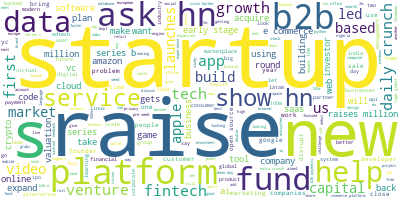

In [15]:
wordcloud.to_image()

In [16]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\punee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [18]:
data = headlines_df.headline_text_processed.values.tolist()
data_words = list(sent_to_words(data))

In [19]:
# remove stop words
data_words = remove_stopwords(data_words)

In [20]:
print(data_words[:1][0][:30])

['techcrunch', 'podcasts', 'week', 'layoffs', 'crypto', 'downturn', 'investor', 'offense', 'columbus', 'ohio']


In [21]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [22]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"stage" + 0.009*"new" + 0.008*"early" + 0.008*"raises" + '
  '0.008*"startup" + 0.007*"apple" + 0.007*"startups" + 0.006*"video" + '
  '0.005*"platform" + 0.005*"fund"'),
 (1,
  '0.008*"hn" + 0.006*"raises" + 0.005*"first" + 0.005*"company" + '
  '0.005*"growth" + 0.005*"ask" + 0.004*"faster" + 0.004*"day" + 0.003*"open" '
  '+ 0.003*"google"'),
 (2,
  '0.015*"raises" + 0.008*"hn" + 0.006*"show" + 0.005*"marketing" + '
  '0.005*"platform" + 0.004*"fund" + 0.004*"one" + 0.004*"end" + 0.004*"using" '
  '+ 0.004*"growth"'),
 (3,
  '0.008*"raises" + 0.006*"us" + 0.005*"platform" + 0.004*"web" + 0.004*"data" '
  '+ 0.004*"high" + 0.004*"marketplace" + 0.003*"fintech" + 0.003*"crunch" + '
  '0.003*"app"'),
 (4,
  '0.010*"new" + 0.009*"raises" + 0.007*"tech" + 0.005*"service" + 0.004*"hn" '
  '+ 0.004*"startup" + 0.004*"series" + 0.004*"show" + 0.003*"platform" + '
  '0.003*"latest"'),
 (5,
  '0.014*"startup" + 0.013*"raises" + 0.013*"hn" + 0.009*"ask" + '
  '0.007*"million" + 0

In [23]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(r'E:\Zemoso Personal\NLP_Results'+str(num_topics))

In [25]:

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

C:\Python\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [26]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [27]:
pyLDAvis.save_html(LDAvis_prepared, r'E:\Zemoso Personal\NLP_Results'+str(num_topics) +'.html')

In [29]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.068733  0.053303       1        1  14.010601
8     -0.022708 -0.051128       2        1  10.669231
0      0.029495 -0.045001       3        1  10.618652
6      0.060172  0.029109       4        1  10.040475
5      0.069570  0.031196       5        1   9.778813
2     -0.046485  0.081520       6        1   9.403440
3     -0.006972  0.000785       7        1   8.998262
9     -0.009260  0.016418       8        1   8.994613
1     -0.143466  0.023307       9        1   8.964751
4      0.000921 -0.139509      10        1   8.521162, topic_info=             Term       Freq      Total Category  logprob  loglift
154       startup  82.000000  82.000000  Default  30.0000  30.0000
19            new  62.000000  62.000000  Default  29.0000  29.0000
725         early  26.000000  26.000000  Default  28.0000  28.0000
728         stage  28.000000  28.000000  Default  27.0000  27.0000
2598          ask  52.000000  52.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
145   marketplace   2.826467  20.729085  Topic10  -6.0697   0.4701
81            day   2.827265  20.891037  Topic10  -6.0694   0.4626
73             us   2.827157  24.031261  Topic10  -6.0694   0.3225
273          saas   2.827202  31.860501  Topic10  -6.0694   0.0405
65          based   2.827239  41.149944  Topic10  -6.0694  -0.2153

[726 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1401      1  0.290849     accel
1401      2  0.436274     accel
1401      4  0.145425     accel
2276     10  0.473011  acquired
147       1  0.319049  acquires
...     ...       ...       ...
3201     10  0.344540     years
1549      1  0.272837       yet
1549      5  0.545674       yet
1739      5  0.923400  younited
1243     10  0.472977     zoomo

[1629 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 1, 7, 6, 3, 4, 10, 2, 5])